## Pandas basics

1. ~DataFrame overview - attributes~
1. ~Rows/Columns handling~
1. ~Boolean Indexing~
1. ~New variable creation~
1. Replacing old values with new
1. Summaries
1. Binning - continuous to categorical

In [1]:
import os
import pandas as pd
# os.chdir(r'D:\Work\00 HV ML course for PT1\01082022')

In [2]:
df = pd.read_csv('../dataset/bank_data.csv',sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


## Data Dictionary
* 1 - age (numeric)
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student","blue-collar","self-employed","retired","technician","services")
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
* 4 - education (categorical: "unknown","secondary","primary","tertiary")
* 5 - default: has credit in default? (binary: "yes","no")
* 6 - balance: average yearly balance (numeric)
* 7 - housing: has housing loan? (binary: "yes","no")
* 8 - loan: has personal loan? (binary: "yes","no")

    #### Related with the last contact of the current campaign:
* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")
* 10 - day: last contact day of the month (numeric)
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")
* 12 - duration: last contact duration, in seconds (numeric)

    #### Other attributes:
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")
* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")

## Pandas basics - Replacing old values with new

### 01. Creating Quarters from months

In [3]:
df['month'].unique()

array(['oct', 'may', 'apr', 'jun', 'feb', 'aug', 'jan', 'jul', 'nov',
       'sep', 'mar', 'dec'], dtype=object)

In [4]:
df['month'].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

In [5]:
df['Quarter'] = df['month'].replace(['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'],
                    ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3','Q4','Q4','Q4'])

In [6]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Q4
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Q2
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no,Q2
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no,Q2
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no,Q2


#### How to check if Quarter labels are assigned correctly

In [7]:
df[['month','Quarter']].head(12)

,month,Quarter
0,oct,Q4
1,may,Q2
2,apr,Q2
3,jun,Q2
4,may,Q2
5,feb,Q1
6,may,Q2
7,may,Q2
8,may,Q2
9,apr,Q2


In [8]:
df.groupby(['Quarter','month']).size()

Quarter  month
Q1       feb       222
         jan       148
         mar        49
Q2       apr       293
         jun       531
         may      1398
Q3       aug       633
         jul       706
         sep        52
Q4       dec        20
         nov       389
         oct        80
dtype: int64

#### Creating the below list more dynamically

In [9]:
quarters = ['Q1','Q1','Q1','Q2','Q2','Q2','Q3','Q3','Q3','Q4','Q4','Q4']
quarters

['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4']

#### Short intro of List Comprehension

In [10]:
import random

In [11]:
random.randint(40,100)

89

In [12]:
for i in range(5):
    print(random.randint(40,100))

97
48
49
78
42


In [13]:
ls_num = []
for i in range(5):
    ls_num.append(random.randint(40,100))
print(ls_num)

[52, 63, 88, 48, 59]


#### List Comprehension way of building a List

In [14]:
#-------Key components in List Comprehension----
#-----[ <operations> <for loop> ]

##### Ex. 1

In [15]:
[random.randint(40,100) for i in range(5)]

[75, 73, 57, 76, 64]

In [16]:
nums = [random.randint(40,100) for i in range(5)]
nums

[80, 71, 44, 41, 54]

##### Ex. 2

In [17]:
[i**2 for i in range(1,5)]

[1, 4, 9, 16]

##### Ex. 3

In [18]:
['Q'+str(i) for i in range(1,5)]

['Q1', 'Q2', 'Q3', 'Q4']

##### Ex. 4 (with nested loops)

In [19]:
['Q'+str(i) for i in range(1,5) for j in range(3)]

['Q1', 'Q1', 'Q1', 'Q2', 'Q2', 'Q2', 'Q3', 'Q3', 'Q3', 'Q4', 'Q4', 'Q4']

### 02. Replacing yes/no labels with 1/0 values across all variables

In [20]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no,Q4
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no,Q2


In [21]:
df.replace(['yes','no'],[1,0])

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter
0,30,unemployed,married,primary,0,1787,0,0,cellular,19,oct,79,1,-1,0,unknown,0,Q4
1,33,services,married,secondary,0,4789,1,1,cellular,11,may,220,1,339,4,failure,0,Q2
2,35,management,single,tertiary,0,1350,1,0,cellular,16,apr,185,1,330,1,failure,0,Q2
3,30,management,married,tertiary,0,1476,1,1,unknown,3,jun,199,4,-1,0,unknown,0,Q2
4,59,blue-collar,married,secondary,0,0,1,0,unknown,5,may,226,1,-1,0,unknown,0,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,1,0,cellular,30,jul,329,5,-1,0,unknown,0,Q3
4517,57,self-employed,married,tertiary,1,-3313,1,1,unknown,9,may,153,1,-1,0,unknown,0,Q2
4518,57,technician,married,secondary,0,295,0,0,cellular,19,aug,151,11,-1,0,unknown,0,Q3
4519,28,blue-collar,married,secondary,0,1137,0,0,cellular,6,feb,129,4,211,3,other,0,Q1


### 03. Replacing yes/no with 1/0 for specific variables

In [22]:
df.replace({'default':{'yes':1,'no':0} , 'loan':{'yes':1,'no':0} })

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter
0,30,unemployed,married,primary,0,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,no,Q4
1,33,services,married,secondary,0,4789,yes,1,cellular,11,may,220,1,339,4,failure,no,Q2
2,35,management,single,tertiary,0,1350,yes,0,cellular,16,apr,185,1,330,1,failure,no,Q2
3,30,management,married,tertiary,0,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,no,Q2
4,59,blue-collar,married,secondary,0,0,yes,0,unknown,5,may,226,1,-1,0,unknown,no,Q2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,0,-333,yes,0,cellular,30,jul,329,5,-1,0,unknown,no,Q3
4517,57,self-employed,married,tertiary,1,-3313,yes,1,unknown,9,may,153,1,-1,0,unknown,no,Q2
4518,57,technician,married,secondary,0,295,no,0,cellular,19,aug,151,11,-1,0,unknown,no,Q3
4519,28,blue-collar,married,secondary,0,1137,no,0,cellular,6,feb,129,4,211,3,other,no,Q1


In [23]:
#-----------Using inplace=True for overwriting----------
df.replace({'default':{'yes':1,'no':0} , 'loan':{'yes':1,'no':0} }, inplace=True)

## Pandas basics - Summaries

In [24]:
df.groupby('job').size()

job
admin.           478
blue-collar      946
entrepreneur     168
housemaid        112
management       969
retired          230
self-employed    183
services         417
student           84
technician       768
unemployed       128
unknown           38
dtype: int64

In [25]:
type(df.groupby('job').size())

pandas.core.series.Series

In [26]:
df.groupby('job').mean().round(2)

,age,default,balance,loan,day,duration,campaign,pdays,previous
job,,,,,,,,,
admin.,39.68,0.01,1226.74,0.19,16.32,234.67,2.63,49.99,0.64
blue-collar,40.16,0.01,1085.16,0.16,15.48,278.16,2.85,41.59,0.49
entrepreneur,42.01,0.04,1645.12,0.24,15.26,285.48,2.59,32.27,0.43
housemaid,47.34,0.02,2083.80,0.12,15.29,292.63,2.50,26.40,0.36
management,40.54,0.01,1766.93,0.12,16.25,260.54,2.97,40.97,0.55
retired,61.87,0.01,2319.19,0.14,15.56,285.66,2.47,35.07,0.59
self-employed,41.45,0.02,1392.41,0.16,16.18,264.13,3.28,28.26,0.59
services,38.57,0.02,1103.96,0.18,15.52,262.49,2.82,36.37,0.44
student,26.82,0.01,1543.82,0.01,16.39,248.69,2.39,45.71,0.96


In [27]:
type(df.groupby('job').mean().round(2))

pandas.core.frame.DataFrame

In [28]:
df.groupby(['job','marital']).mean().round(2)

age  default  balance  loan    day  duration  \
job           marital                                                    
admin.        divorced  43.36     0.06   977.81  0.20  16.83    288.19   
              married   41.48     0.01  1353.27  0.20  16.44    220.41   
              single    34.55     0.00  1111.48  0.16  15.87    235.38   
blue-collar   divorced  42.94     0.01   744.80  0.15  15.35    322.32   
              married   41.52     0.01  1064.36  0.16  15.27    258.25   
              single    33.48     0.03  1322.54  0.18  16.37    337.41   
entrepreneur  divorced  46.44     0.19   889.75  0.31  13.69    394.12   
              married   42.86     0.02  1612.83  0.22  15.52    269.06   
              single    32.90     0.05  2462.60  0.35  14.75    306.90   
housemaid     divorced  47.54     0.08  1166.23  0.00  17.08    340.77   
              married   48.49     0.01  1759.46  0.14  15.50    276.95   
              single    40.73     0.00  4695.33  0.07  12.60    338.73   
management    divorced  44.24     0.02  1432.35  0.21  16.11    254.05   
              married   42.49     0.01  1858.08  0.13  16.04    273.22   
              single    35.33     0.02  1729.53  0.08  16.72    239.06   
retired       divorced  64.00     0.02  1771.47  0.14  15.40    364.56   
              married   62.23     0.01  2383.86  0.13  15.38    265.32   
              single    47.82     0.00  3425.64  0.27  19.00    302.55   
self-employed divorced  48.33     0.00  2572.07  0.13  15.80    258.67   
              married   42.64     0.02  1350.94  0.17  15.30    228.78   
              single    35.27     0.02  1089.27  0.15  19.05    375.61   
services      divorced  43.11     0.02   931.56  0.11  14.52    262.16   
              married   40.38     0.02  1228.03  0.22  16.12    269.75   
              single    32.62     0.02   947.72  0.13  14.83    248.24   
student       married   33.90     0.10   468.30  0.00  21.40    275.90   
              single    25.86     0.00  1689.16  0.01  15.72    245.01   
technician    divorced  42.58     0.04   845.79  0.19  16.28    228.40   
              married   42.30     0.01  1436.92  0.17  16.68    231.83   
              single    34.10     0.02  1329.69  0.13  15.39    291.28   
unemployed    divorced  46.82     0.05   842.91  0.09  14.36    208.91   
              married   42.47     0.00  1131.59  0.13  16.81    325.87   
              single    32.94     0.06  1162.35  0.03  15.58    307.29   
unknown       divorced  31.00     0.00   137.00  0.00  22.00    385.00   
              married   51.20     0.00  1275.93  0.03  15.30    235.27   
              single    37.29     0.00  2664.29  0.00  17.29    114.29   

                        campaign  pdays  previous  
job           marital                              
admin.        divorced      2.46  52.55      0.41  
              married       2.81  46.27      0.56  
              single        2.38  55.68      0.92  
blue-collar   divorced      2.53  28.29      0.32  
              married       2.91  43.25      0.52  
              single        2.74  41.03      0.48  
entrepreneur  divorced      2.56  36.44      0.31  
              married       2.60  28.82      0.34  
              single        2.55  51.75      1.10  
housemaid     divorced      2.31  40.92      0.77  
              married       2.54  24.08      0.27  
              single        2.47  26.80      0.47  
management    divorced      2.85  40.15      0.62  
              married       2.90  38.13      0.52  
              single        3.17  46.69      0.57  
retired       divorced      2.21  41.26      0.56  
              married       2.53  31.11      0.58  
              single        2.36  74.36      0.91  
self-employed divorced      2.40  41.67      0.60  
              married       3.51  34.60      0.74  
              single        2.88   3.71      0.12  
services      divorced      1.94  32.63      0.32  
              married       2.99  33.48

In [29]:
df.groupby('job')['balance'].mean()

job
admin.           1226.736402
blue-collar      1085.161734
entrepreneur     1645.125000
housemaid        2083.803571
management       1766.928793
retired          2319.191304
self-employed    1392.409836
services         1103.956835
student          1543.821429
technician       1330.996094
unemployed       1089.421875
unknown          1501.710526
Name: balance, dtype: float64

In [30]:
#----------------Use of an additional pair of [] brackets converts a Series into a DataFrame----
df.groupby('job')[['balance']].mean()

,balance
job,
admin.,1226.736402
blue-collar,1085.161734
entrepreneur,1645.125000
housemaid,2083.803571
management,1766.928793
retired,2319.191304
self-employed,1392.409836
services,1103.956835
student,1543.821429


In [31]:
df.groupby('job')[['balance','pdays']].mean().round(2)

,balance,pdays
job,,
admin.,1226.74,49.99
blue-collar,1085.16,41.59
entrepreneur,1645.12,32.27
housemaid,2083.80,26.40
management,1766.93,40.97
retired,2319.19,35.07
self-employed,1392.41,28.26
services,1103.96,36.37
student,1543.82,45.71


In [32]:
#------------------reset_index() resets the DataFrame index to Integer values. 
#------------------Previously used Index values become a part of the DataFrame
df.groupby('job')[['balance','pdays']].mean().round(2).reset_index()

,job,balance,pdays
0,admin.,1226.74,49.99
1,blue-collar,1085.16,41.59
2,entrepreneur,1645.12,32.27
3,housemaid,2083.80,26.40
4,management,1766.93,40.97
5,retired,2319.19,35.07
6,self-employed,1392.41,28.26
7,services,1103.96,36.37
8,student,1543.82,45.71
9,technician,1331.00,39.27


In [33]:
df.groupby('job')

In [34]:
df.head(2)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter
0,30,unemployed,married,primary,0,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,no,Q4
1,33,services,married,secondary,0,4789,yes,1,cellular,11,may,220,1,339,4,failure,no,Q2


#### Advanced application of the groupby() method by using aggregate() or short form agg()

In [35]:
#------------First creating a Dictionary of the operations to be performed-------
operations = {'balance':'mean' ,'duration':'median', 'y':'count'}
operations

{'balance': 'mean', 'duration': 'median', 'y': 'count'}

In [36]:
#----------Dictionary of operations is fed in the aggregate() method----------
df.groupby('job').aggregate(operations).round(2)

,balance,duration,y
job,,,
admin.,1226.74,161.0,478
blue-collar,1085.16,204.0,946
entrepreneur,1645.12,195.0,168
housemaid,2083.80,183.0,112
management,1766.93,176.0,969
retired,2319.19,206.0,230
self-employed,1392.41,174.0,183
services,1103.96,185.0,417
student,1543.82,194.5,84


In [37]:
df.groupby(['job','y']).aggregate(operations).round(2)

balance  duration    y
job           y                          
admin.        no   1212.25     149.0  420
              yes  1331.64     359.5   58
blue-collar   no   1089.78     192.0  877
              yes  1026.49     681.0   69
entrepreneur  no   1713.95     183.0  153
              yes   943.13     549.0   15
housemaid     no   1824.30     171.0   98
              yes  3900.36     563.5   14
management    no   1772.15     159.0  838
              yes  1733.55     411.0  131
retired       no   2269.75     158.0  176
              yes  2480.33     407.0   54
self-employed no   1373.48     162.0  163
              yes  1546.70     517.5   20
services      no   1103.08     172.0  379
              yes  1112.66     553.0   38
student       no   1644.83     160.0   65
              yes  1198.26     258.0   19
technician    no   1319.51     164.0  685
              yes  1425.80     442.0   83
unemployed    no   1061.54     172.0  115
              yes  1336.08     493.0   13
unknown       no   1536.00     122.0   31
              yes  1349.86     335.0    7

In [38]:
df.replace({'y':{'yes':1,'no':0}},inplace=True)

In [39]:
#--------Multiple operations on the same Numeric variable can be performed by using a List of operations-----
operations = {'balance':'mean' ,'duration':'median', 'y':['count','mean']}
operations

{'balance': 'mean', 'duration': 'median', 'y': ['count', 'mean']}

In [40]:
df.groupby('job').aggregate(operations).round(2)

balance duration     y      
                  mean   median count  mean
job                                        
admin.         1226.74    161.0   478  0.12
blue-collar    1085.16    204.0   946  0.07
entrepreneur   1645.12    195.0   168  0.09
housemaid      2083.80    183.0   112  0.12
management     1766.93    176.0   969  0.14
retired        2319.19    206.0   230  0.23
self-employed  1392.41    174.0   183  0.11
services       1103.96    185.0   417  0.09
student        1543.82    194.5    84  0.23
technician     1331.00    181.5   768  0.11
unemployed     1089.42    210.0   128  0.10
unknown        1501.71    156.5    38  0.18

## Creating bins from a continuous variable

In [41]:
df.head(3)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter
0,30,unemployed,married,primary,0,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0,Q4
1,33,services,married,secondary,0,4789,yes,1,cellular,11,may,220,1,339,4,failure,0,Q2
2,35,management,single,tertiary,0,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0,Q2


In [42]:
df['pdays']

0        -1
1       339
2       330
3        -1
4        -1
       ... 
4516     -1
4517     -1
4518     -1
4519    211
4520    249
Name: pdays, Length: 4521, dtype: int64

In [43]:
#-----------Looking at variable distribution before deciding the bin ranges------------
df['pdays'].describe()

count    4521.000000
mean       39.766645
std       100.121124
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max       871.000000
Name: pdays, dtype: float64

#### Creating a subset (with values >=0) separately

In [44]:
temp = df[df['pdays']>=0]
temp['pdays']

1       339
2       330
5       176
6       330
9       147
       ... 
4492    234
4504    370
4514    153
4519    211
4520    249
Name: pdays, Length: 816, dtype: int64

#### Creating a subset (with values >=0) on the fly and applying describe()

In [45]:
df[df['pdays']>=0]['pdays'].describe()

count    816.000000
mean     224.865196
std      117.200417
min        1.000000
25%      136.000000
50%      189.000000
75%      330.000000
max      871.000000
Name: pdays, dtype: float64

## using pd.cut() to apply binning

In [46]:
pd.cut(df['pdays'],[-1,60,90,1000])

0                  NaN
1       (90.0, 1000.0]
2       (90.0, 1000.0]
3                  NaN
4                  NaN
             ...      
4516               NaN
4517               NaN
4518               NaN
4519    (90.0, 1000.0]
4520    (90.0, 1000.0]
Name: pdays, Length: 4521, dtype: category
Categories (3, interval[int64, right]): [(-1, 60] < (60, 90] < (90, 1000]]

In [47]:
#--------------Using right=False to change the boundary conditions----------
pd.cut(df['pdays'],[-1,60,90,1000],right=False)

0         [-1, 60)
1       [90, 1000)
2       [90, 1000)
3         [-1, 60)
4         [-1, 60)
           ...    
4516      [-1, 60)
4517      [-1, 60)
4518      [-1, 60)
4519    [90, 1000)
4520    [90, 1000)
Name: pdays, Length: 4521, dtype: category
Categories (3, interval[int64, left]): [[-1, 60) < [60, 90) < [90, 1000)]

In [48]:
df['pdays_bins'] = pd.cut(df['pdays'],[-1,60,100,180,366,1000],right=False)

In [49]:
#-----------------Declaring bin labels separately as a List-----------
bin_labels = ['-1','<60','60-100','100-180','180-366','>366']

In [50]:
df['pdays_bins'] = pd.cut(df['pdays'],[-1,0,60,100,180,366,1000],right=False,labels = bin_labels)

In [51]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter,pdays_bins
0,30,unemployed,married,primary,0,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0,Q4,-1
1,33,services,married,secondary,0,4789,yes,1,cellular,11,may,220,1,339,4,failure,0,Q2,180-366
2,35,management,single,tertiary,0,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0,Q2,180-366
3,30,management,married,tertiary,0,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,0,Q2,-1
4,59,blue-collar,married,secondary,0,0,yes,0,unknown,5,may,226,1,-1,0,unknown,0,Q2,-1


In [52]:
#------------Validating binning logic-------
df.groupby(['pdays_bins']).aggregate({'pdays':['min','max','count']})

pdays           
             min  max count
pdays_bins                 
-1            -1   -1  3705
<60            1   59    20
60-100        60   99   114
100-180      100  179   193
180-366      180  365   423
>366         366  871    66

In [53]:
df.groupby(['pdays_bins']).aggregate({'pdays':['min','max','count'],'y':'mean'})

pdays                    y
             min  max count      mean
pdays_bins                           
-1            -1   -1  3705  0.090958
<60            1   59    20  0.250000
60-100        60   99   114  0.491228
100-180      100  179   193  0.139896
180-366      180  365   423  0.184397
>366         366  871    66  0.272727

## Exploratory Analysis - Univariate and Multivariate
1. Frequncy Distributions - Histograms and Bar plots
2. Statistical Summaries
3. Box plots
4. Pair plots
5. Missing values check
6. Capping/ Flooring

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

#### Simple matplotlib plots

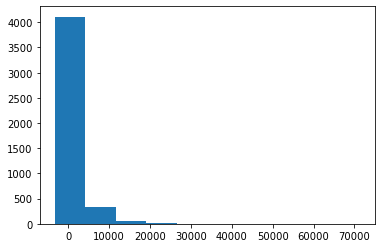

In [55]:
plt.hist(df['balance'])
plt.show()

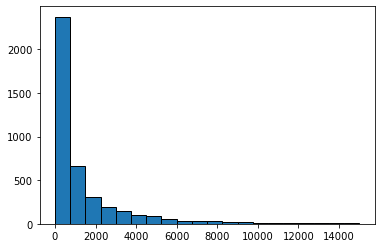

In [56]:
plt.hist(df['balance'],bins=20,edgecolor='black',range=(0,15000))
plt.show()

In [57]:
#help(plt.hist)

### Setting Seaborn theme
https://seaborn.pydata.org/generated/seaborn.set_theme.html

In [58]:
sns.set_theme()

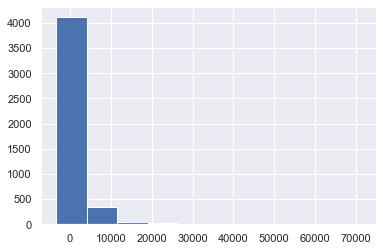

In [59]:
plt.hist(df['balance'])
plt.show()

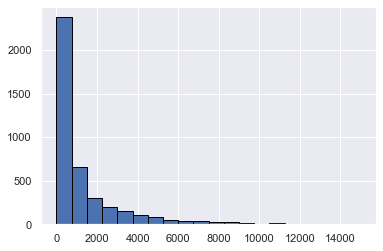

In [60]:
plt.hist(df['balance'],bins=20,edgecolor='black',range=(0,15000))
plt.show()

### Seaborn plots

#### Histogram plots

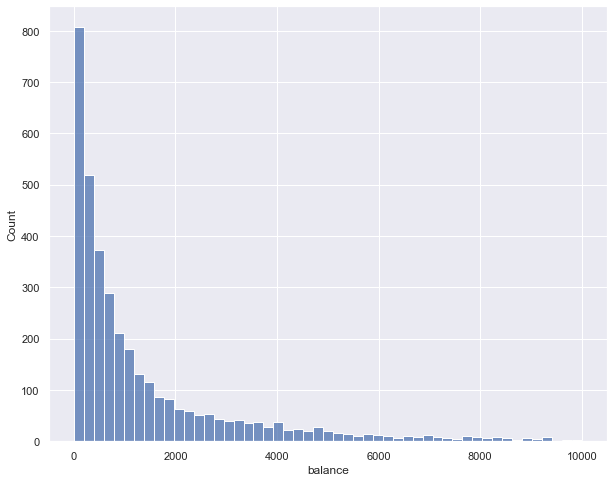

In [61]:
plt.figure(figsize=(10,8))
sns.histplot(df['balance'],binrange=(10,10000));

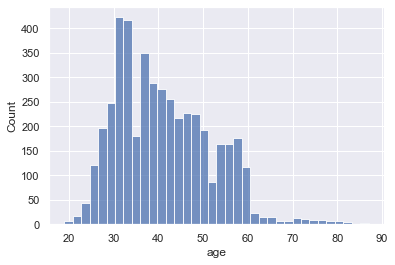

In [62]:
#plt.figure(figsize=(10,8))
sns.histplot(df['age']);

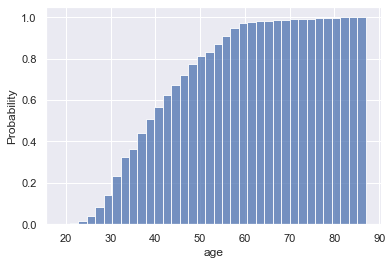

In [63]:
sns.histplot(df['age'],cumulative=True,stat='probability');

/Users/siddharthkothotya/anaconda3/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='housing', ylabel='count'>

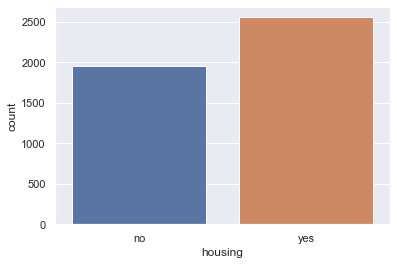

In [64]:
sns.countplot(df['housing'])

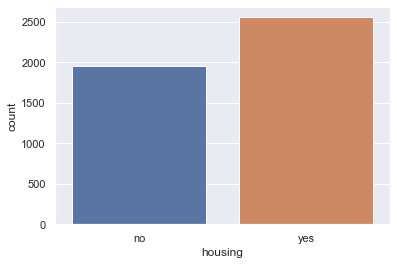

In [65]:
sns.countplot(data=df,x='housing');

#### Bar plots

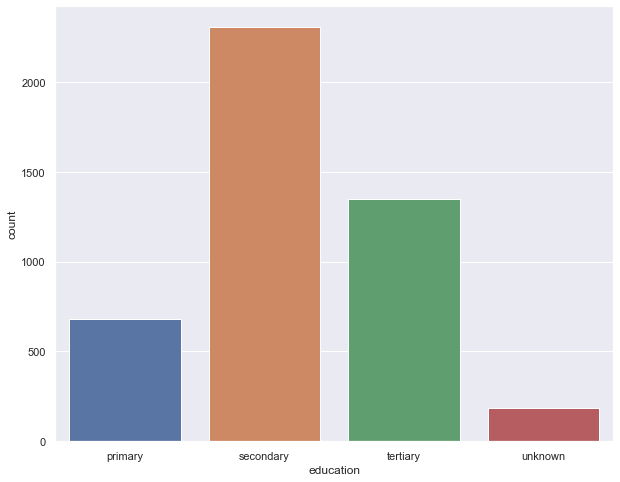

In [66]:
plt.figure(figsize=(10,8))
sns.countplot(data=df,x='education');

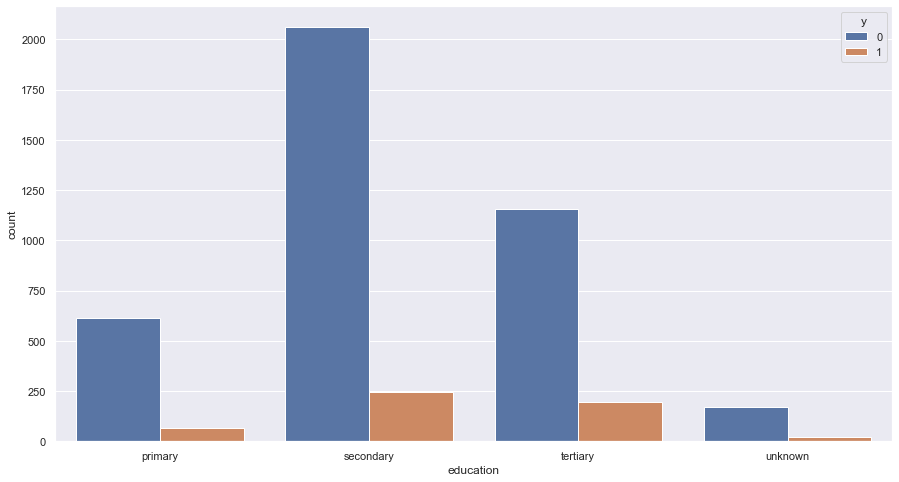

In [67]:
plt.figure(figsize=(15,8))
sns.countplot(data=df,x='education',hue='y');

#### Box plots

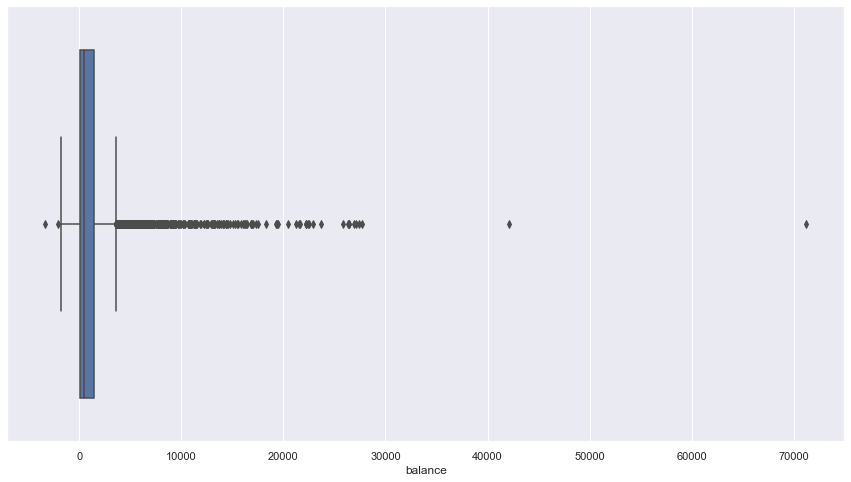

In [68]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='balance');

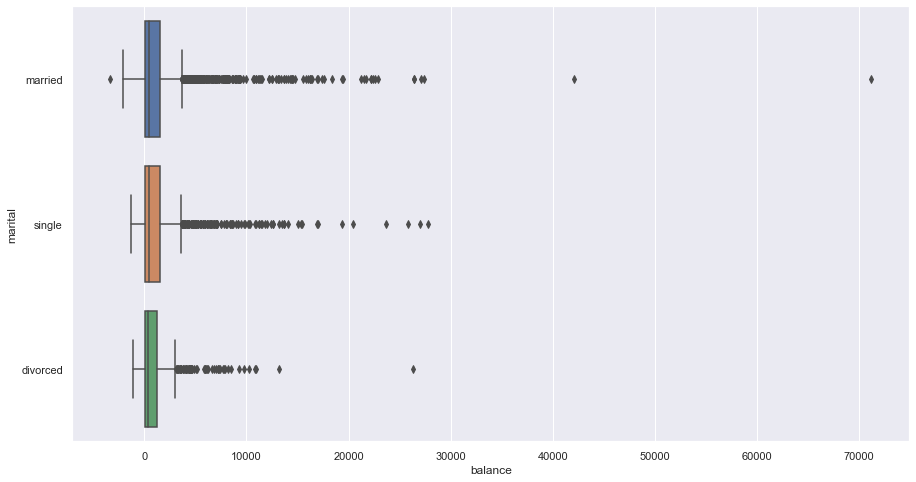

In [69]:
plt.figure(figsize=(15,8))
sns.boxplot(data=df,x='balance',y='marital');

In [70]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,Quarter,pdays_bins
0,30,unemployed,married,primary,0,1787,no,0,cellular,19,oct,79,1,-1,0,unknown,0,Q4,-1
1,33,services,married,secondary,0,4789,yes,1,cellular,11,may,220,1,339,4,failure,0,Q2,180-366
2,35,management,single,tertiary,0,1350,yes,0,cellular,16,apr,185,1,330,1,failure,0,Q2,180-366
3,30,management,married,tertiary,0,1476,yes,1,unknown,3,jun,199,4,-1,0,unknown,0,Q2,-1
4,59,blue-collar,married,secondary,0,0,yes,0,unknown,5,may,226,1,-1,0,unknown,0,Q2,-1


In [71]:
df = pd.read_csv('bank_data.csv',sep=';')
df.head()

FileNotFoundError: [Errno 2] No such file or directory: 'bank_data.csv'

### Dropping variables (for pairplot)

In [ ]:
df.drop(['day','month'],axis=1,inplace=True)

In [ ]:
df.head()

#### Pairplot

In [ ]:
sns.pairplot(df);

In [ ]:
sns.pairplot(df,y_vars=['y']);

## Statistical Summaries

In [ ]:
df.head()

In [ ]:
df.describe().round(2)

In [ ]:
#------------Adding custom percentiles----------
df.describe([0.01,0.05,0.9,0.99]).round(2)

In [ ]:
#---------------Viewing summary on categorical variables------------
df.describe(include='object')

## Observing missing values in a Dataset

In [ ]:
os.chdir(r'D:\Work\00 HV ML course for PT1\01092022')

In [ ]:
os.listdir()

In [ ]:
df_miss = pd.read_csv('Students_eval_miss.csv')
df_miss

In [72]:
df_miss.info()

NameError: name 'df_miss' is not defined

In [ ]:
#---------------Using isnull() to detect Nan value (gives True if Nan, False otherwise)--------
df_miss.isnull()

In [ ]:
#-----------Accessing all DataFrame values in an Array-------
df_miss.isnull().values

#### Checking for null value at an overall level

In [73]:
df_miss.isnull().values.any()

NameError: name 'df_miss' is not defined

In [ ]:
df_miss.isnull().values.sum()

In [ ]:
df_miss.isnull().head()

In [ ]:
#-----------Number of missing values for each variable------
df_miss.isnull().sum(0)

## Creating a Simple Decision Tree

In [74]:
dic = {'x1':list(range(1,11)),
       'label':[0,0,0,0,0,1,1,1,1,1]}
sample_df = pd.DataFrame(dic)
sample_df

,x1,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1


In [75]:
type(sample_df['x1'])

pandas.core.series.Series

In [76]:
type(sample_df[['x1']])

pandas.core.frame.DataFrame

In [77]:
X = sample_df[['x1']]
X

,x1
0,1
1,2
2,3
3,4
4,5
5,6
6,7
7,8
8,9
9,10


In [78]:
#--------Decision Trees--------
from sklearn import tree

In [79]:
model = tree.DecisionTreeClassifier(max_depth=3)

In [80]:
model.fit(X,sample_df['label'])

DecisionTreeClassifier(max_depth=3)

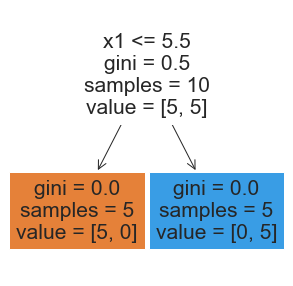

In [81]:
plt.figure(figsize=(5,5))
tree.plot_tree(model,filled=True,feature_names=X.columns);

In [82]:
sample_df

,x1,label
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0
5,6,1
6,7,1
7,8,1
8,9,1
9,10,1
